In [0]:
import numpy as np
import pandas as pd


In [0]:
df = pd.read_csv("https://raw.githubusercontent.com/Priyankk18k/Bangalore_City_data_Scrapping/master/Bengaluru_House_Data.csv")

In [0]:
print("The dataset Has {} number of rows and {} number of columns".format(df.shape[0],df.shape[1])) 

The dataset Has 13320 number of rows and 9 number of columns


In [0]:
##### Finding Out the duplicate values in the Dataset.
print("The Duplicates value in the Dataset are {}.".format(df.duplicated().sum()))

The Duplicates value in the Dataset are 529.


# MissingValueAnalysis

In [0]:
df.isnull().sum()
### Here we can see that the columns contains the null values are :- Location,size,society,bath,balcony,price


area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [0]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [0]:
categorical_columns = ["size","society","bath","balcony","area_type","location"]
non_categorical_columns = [i for i in df.columns if i not in categorical_columns]


Categorical values can be filled with a word "Unknown" as we can't find the average mean,median of categorical columns also we can't implement a KNN_imputation merthod here.

In [0]:
new_df = df.fillna({'society': 'unknown',
                   'size': 'unknown', 'location': 'unknown'})
new_df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,unknown,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,unknown,1200,2.0,1.0,51.00


In [0]:
new_df.isnull().sum()
### Now we have Null values for the BAth and balcony columns. 
### We will try to find out the relationship between the size of the flat and number of bathroom in the flat.

area_type         0
availability      0
location          0
size              0
society           0
total_sqft        0
bath             73
balcony         609
price             0
dtype: int64

In [0]:
df["size"].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 Bedroom       2
11 BHK           2
10 BHK           2
12 Bedroom       1
19 BHK           1
14 BHK           1
16 BHK           1
18 Bedroom       1
43 Bedroom       1
27 BHK           1
13 BHK           1
Name: size, dtype: int64

In [0]:
flat_with_2_bathroom = 0
flat_with_1_bathroom = 0
property_with_1_bathroom = 0
property_with_2_bathroom = 0
property_with_3_bathroom = 0
property_with_4_bathroom = 0

for size,bathroom in zip(new_df["size"],new_df["bath"]):
      if str(size) == "2 BHK":
          if bathroom == 2:
              flat_with_2_bathroom += 1
          else:
              flat_with_1_bathroom += 1 
      if str(size) == "3 BHK":
          if bathroom == 1:
            property_with_1_bathroom += 1          
          elif bathroom == 2:
            property_with_2_bathroom += 1
          elif bathroom == 3:
            property_with_3_bathroom += 1
          else:
            property_with_4_bathroom += 1
            
            
print("Property with 2 bathrooms are {} and property with 1 bathrooms are {}".format(flat_with_2_bathroom,flat_with_1_bathroom))  
print("Property with 4 bathrooms are {} ,property with 3 bathrooms are {},property with 2 bathrooms are {},property with 1 bathrooms are {}".format(property_with_4_bathroom,property_with_3_bathroom,property_with_2_bathroom,property_with_1_bathroom))              

          

Property with 2 bathrooms are 5038 and property with 1 bathrooms are 161
Property with 4 bathrooms are 276 ,property with 3 bathrooms are 2619,property with 2 bathrooms are 1414,property with 1 bathrooms are 1


With The above result we can make a assumption that if a flat is 2BHK then number of bathrooms are 2 for 3 BHK its 3 and so on.


In [0]:
new_df["bath"].fillna(method = "ffill", inplace = True)
new_df.head(4)
new_df["balcony"].fillna(method = "ffill", inplace = True)
new_df


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,unknown,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,unknown,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,1.0,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,1.0,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,unknown,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,unknown,1020,6.0,1.0,370.00


In [0]:
########## Finding out the missing value and its percentage of the remaining columns ######
columns_with_nan_values = []
columns_without_nan_values = []
for i in new_df.columns:
    if new_df[i].isnull().sum() > 0:
        columns_with_nan_values.append(i)
    else :
        columns_without_nan_values.append(i)
###### Missing Value analysis and finding out the percentage of missing values ######

missing_value = pd.DataFrame(new_df.isnull().sum()).reset_index()
missing_value = missing_value.rename(columns = {'index': 'Variables', 0: 'Missing_values'})
missing_value
missing_value['Missing_percentage'] = round(missing_value['Missing_values']/len(new_df)*100,2) 
missing_value = missing_value.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)
missing_value

,Variables,Missing_values,Missing_percentage
0,area_type,0,0.0
1,availability,0,0.0
2,location,0,0.0
3,size,0,0.0
4,society,0,0.0
5,total_sqft,0,0.0
6,bath,0,0.0
7,balcony,0,0.0
8,price,0,0.0


Now We can see that there is no missing value in our data. We can have some plots now to find the relationship between the variables to predict prices

In [0]:
prices = new_df["price"]
    # Minimum price of the data
minimum_price = np.min(prices)

# Maximum price of the data
maximum_price = np.max(prices)

# Mean price of the data
mean_price = np.mean(prices)

# Median price of the data
median_price = np.median(prices)

# Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print("Statistics for Bangalore housing dataset:\n")
print("Minimum price: lacs {:,.2f}".format(minimum_price))
print("Maximum price: lacs {:,.2f}".format(maximum_price))
print("Mean price: lacs {:,.2f}".format(mean_price))
print("Median price lacs {:,.2f}".format(median_price))
print("Standard deviation of prices: lacs {:,.2f}".format(std_price))

Statistics for Bangalore housing dataset:

Minimum price: lacs 8.00
Maximum price: lacs 3,600.00
Mean price: lacs 112.57
Median price lacs 72.00
Standard deviation of prices: lacs 148.97


In [0]:
new_df.describe()

,bath,balcony,price
count,13320.000000,13320.000000,13320.000000
mean,2.691742,1.586411,112.565627
std,1.339907,0.818939,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [0]:
from sklearn.preprocessing import LabelEncoder

number = LabelEncoder()
new_df['location'] = number.fit_transform(new_df['location'].astype(str))
new_df['availability'] = number.fit_transform(new_df['availability'].astype(str))
new_df['size'] = number.fit_transform(new_df['size'].astype(str))
new_df['area_type'] = number.fit_transform(new_df['area_type'].astype(str))
# list(number.inverse_transform(new_df['area_type'])) ## TO get back the lable 



In [0]:
total_sqft = []
for i in new_df['total_sqft']:
  a = i.replace('-','').strip()
  a = a.replace("Sq. Meter", '')
  a = a.replace("  ", '')
  a = a.replace("Perch", '')
  a = a.replace("Sq. Yards", '')
  a = a.replace("Ac", '')
  a = a.replace("re", '')
  a = a.replace("s", '')
  a = a.replace("Cen", '')
  a = a.replace("t", '')
  a = a.replace("Gu", '')
  a = a.replace("nh", '')
  a = a.replace("Gro", '')
  a = a.replace("a", '')
  a = a.replace("und", '')
  a = a[0:4]
  total_sqft.append(a)
new_df['original_sqft'] = total_sqft  
new_df.columns
new_df['original_sqft']=new_df['original_sqft'].astype(np.float)


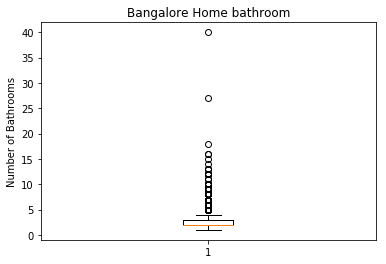

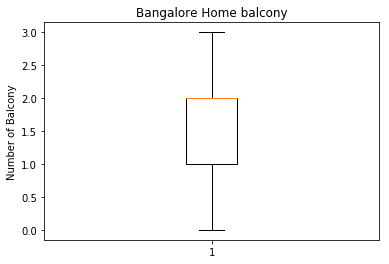

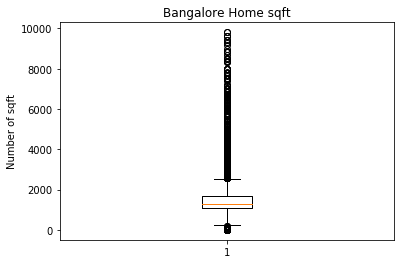

In [0]:
# Boxplot of prices to get a sense of the data

import matplotlib.pyplot as plt
%matplotlib inline

plt.title("Bangalore Home bathroom")
plt.ylabel("Number of Bathrooms")
plt.boxplot(new_df["bath"])
plt.show()


plt.title("Bangalore Home balcony")
plt.ylabel("Number of Balcony")
plt.boxplot(new_df["balcony"])
plt.show()


plt.title("Bangalore Home sqft")
plt.ylabel("Number of sqft")
plt.boxplot(new_df["original_sqft"])
plt.show()




As We can see that the number of bathrooms consist of more number of outliers. We have to remove it.
Number of balcony doesn't contain any outlier we can keep it as it is.


1.   Number of Bathroom consist Outliers

2.   Number of sqft consist Outliers




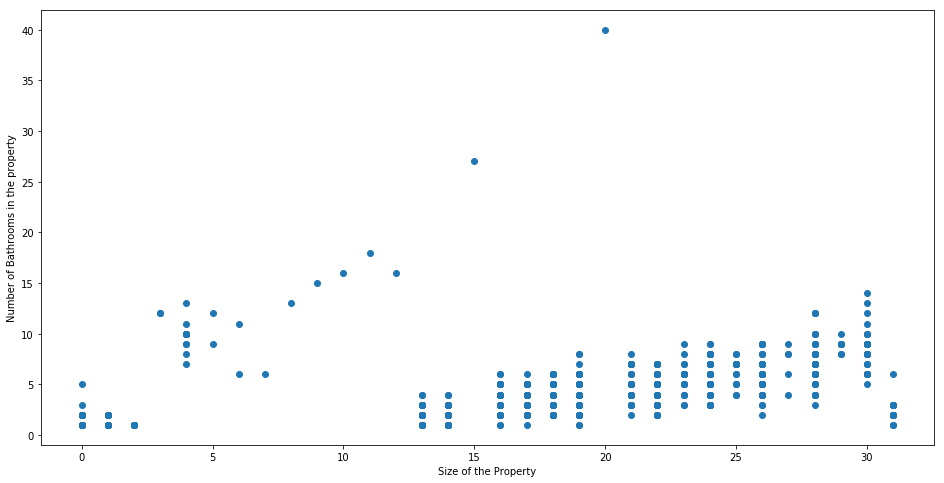

In [0]:
#### Bivariate analysis #####
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(new_df['size'], new_df['bath'])
ax.set_xlabel('Size of the Property')
ax.set_ylabel('Number of Bathrooms in the property')
plt.show()

Now Try to find out the realtionship between the variables.

<function seaborn.utils.despine>

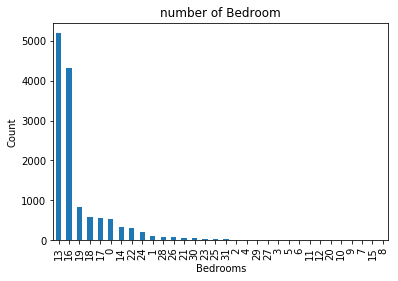

In [0]:
import seaborn as sns
new_df['size'].value_counts().plot(kind='bar')
plt.title('number of Bedroom')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
sns.despine

#### Now we can SEE that The more number of buyer are for the Classes 13(3BHK) and 16(4BHK) followed by 19. 
#### So they have to focus on these class first to build the property.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1152x720 with 0 Axes>

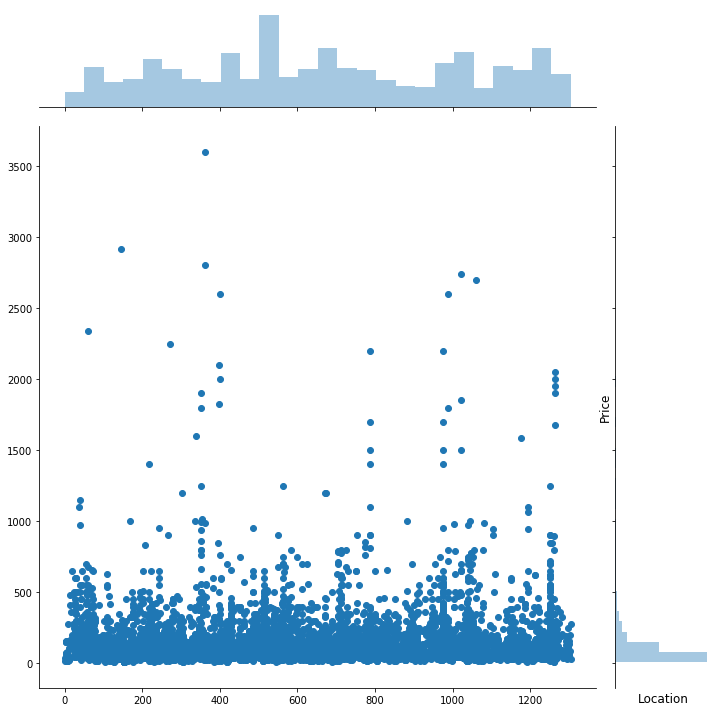

<function seaborn.utils.despine>

In [0]:
plt.figure(figsize=(16,10))
sns.jointplot(x=new_df.location.values, y=new_df.price.values, size=10)
plt.ylabel('Price', fontsize=12)
plt.xlabel('Location', fontsize=12)
plt.show()
# plt1 = plt()
sns.despine

Text(0.5, 1.0, 'Price vs Square Feet')

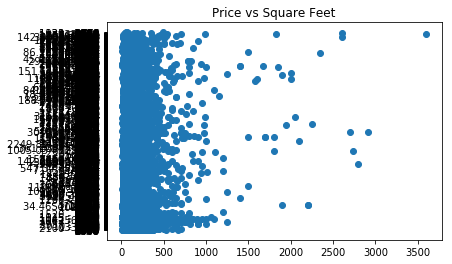

In [0]:
plt.scatter(new_df.price,new_df.total_sqft)
plt.title("Price vs Square Feet")

Here We can see that the Location near 400 has the maximum price which gives us the idea about the price is dependent on location.

In [0]:
##### Finding the outlier for the Data with IQR(interquartile range)
from scipy import stats
import numpy as np
from numpy import percentile
q25, q75 = percentile(new_df['bath'], 25), percentile(new_df['bath'], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
outliers = [x for x in new_df['bath'] if x < lower or x > upper]
outliers_removed = [x for x in new_df['bath'] if x >= lower and x <= upper]


In [0]:
## REmoving Outliers ###
q25, q75 = percentile(new_df['original_sqft'], 25), percentile(new_df['original_sqft'], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
outliers = [x for x in new_df['original_sqft'] if x < lower or x > upper]
outliers_removed = [x for x in new_df['original_sqft'] if x >= lower and x <= upper]



In [0]:
for i in ['bath','original_sqft']:
    q75,q25 = np.percentile(new_df.loc[:,i],[75,25])
    iqr = q75-q25
    min = q25-1.5*iqr
    max = q75+1.5*iqr
    new_df.loc[new_df[i] < min,i] = min
    new_df.loc[new_df[i] > max,i] = max

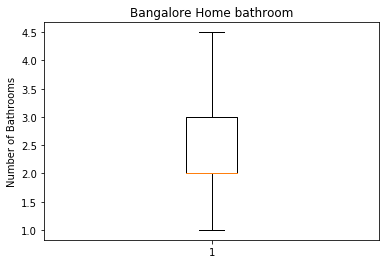

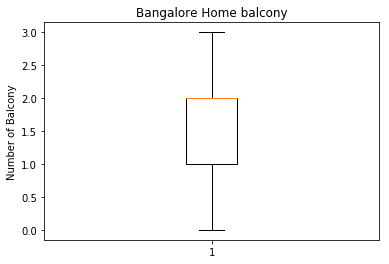

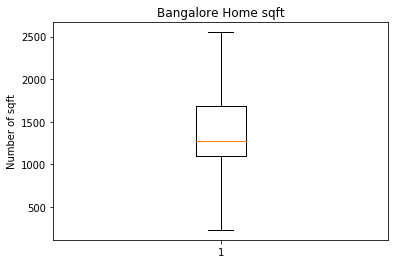

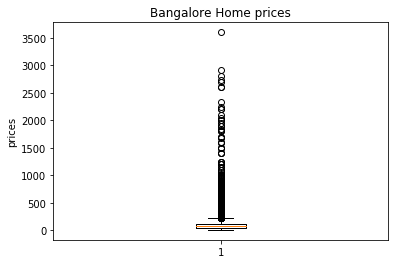

In [0]:
plt.title("Bangalore Home bathroom")
plt.ylabel("Number of Bathrooms")
plt.boxplot(new_df["bath"])
plt.show()


plt.title("Bangalore Home balcony")
plt.ylabel("Number of Balcony")
plt.boxplot(new_df["balcony"])
plt.show()


plt.title("Bangalore Home sqft")
plt.ylabel("Number of sqft")
plt.boxplot(new_df["original_sqft"])
plt.show()


plt.title("Bangalore Home prices")
plt.ylabel("prices")
plt.boxplot(new_df["price"])
plt.show()


As We can see that in our target variable ther is presence of outlier which will affect our prediction. To make our predictions more accurate we can do 2 things 


1.   Either we can remove the rows
2.   Or we can limit the outlier upto certain range with the help of IQR.

2nd option is correct as we it will result in save us the data.



In [0]:
for i in ['price']:
    q75,q25 = np.percentile(new_df.loc[:,i],[75,25])
    iqr = q75-q25
    min = q25-1.5*iqr
    max = q75+1.5*iqr
    new_df.loc[new_df[i] < min,i] = min
    new_df.loc[new_df[i] > max,i] = max

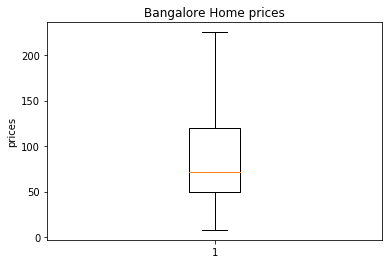

In [0]:

plt.title("Bangalore Home prices")
plt.ylabel("prices")
plt.boxplot(new_df["price"])
plt.show()

Now we Can see that outlier is removed from the outlier prone variables. Now we can test our model with the algo.

In [0]:
# Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score

def performance_metric(y_true,y_predict):
  """Calculates and returns the performance score between 
        true and predicted values based on the metric chosen."""
  score=r2_score(y_true,y_predict)
  return score



In [0]:
prices=new_df['price']
features = new_df.drop('price',axis=1)
##### Droping price as it is a target variable ######

features = features.drop('society',axis=1)
features = features.drop('total_sqft',axis=1)
features
### Dropping total_sqft because we have already made a new column called original_sqft with all the original values in float#####
features = features[['original_sqft','bath','location','size']]




In [0]:
from sklearn.model_selection import train_test_split
#Shuffle and split the data into training and testing subsets
X_train,X_test,y_train,y_test=train_test_split(features,prices,test_size=0.10,random_state=5)
print('Training and Testing split was successful')
print("Train shapes (X,y): ", X_train.shape, y_train.shape)
print("Test shapes (X,y): ", X_test.shape, y_test.shape)

Training and Testing split was successful
Train shapes (X,y):  (11988, 4) (11988,)
Test shapes (X,y):  (1332, 4) (1332,)


In [0]:
from sklearn.linear_model import LinearRegression,LogisticRegression
reg = LinearRegression()
reg.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
reg.score(X_test,y_test)


0.6544003791005721

As Now we can see that after removal of the outlier from the price our accuracy boom from 35% to 65%. We can further improve it with the help of Gradient Boosting algo.

In [0]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')

clf.fit(X_train, y_train)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=400,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
clf.score(X_test,y_test)


0.7902553080300938

As We can see that with the help of GradientBoostingRegressor we get a good accuray of almost 80% which is really cool. We can further improve it when we will make the dataset and can take more dependent variables to predict the target variables.

In [0]:
def reg_acc(y_true, y_pre):
    from math import sqrt
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import r2_score
    print ("MSE of data: ", mean_squared_error(y_true,y_pre))
    print ("RMSE of data: ", sqrt(mean_squared_error(y_true,y_pre)))
    print ('Other Parameters:')
    print ("R² : ", r2_score(y_true,y_pre)) ### How close the data is fitted towards the regression line.
    print ('MAE:',mean_absolute_error(y_true,y_pre))

In [0]:
from sklearn import tree
Deci_tree_pre = tree.DecisionTreeRegressor().fit(X_train,y_train).predict(X_test)
print('Decision Tree ML #######################################################')
reg_acc(Deci_tree_pre,y_test)
print("###############################################################################################")
Ran_for_pre = ensemble.RandomForestRegressor(n_estimators=50).fit(X_train,y_train).predict(X_test)
print('Random Forest ML #######################################################')
reg_acc(Ran_for_pre,y_test)
print("############################################################################################")                                                                                                                                                                    
linear_reg_pre = LinearRegression().fit(X_train,y_train).predict(X_test)
print('Linear Regression ML #######################################################')
reg_acc(linear_reg_pre,y_test)
print("################################################################################################")      
gradient_boosting_pre = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls').fit(X_train, y_train).predict(X_test)
print('Gradient Boosting ML #######################################################')
reg_acc(gradient_boosting_pre,y_test)



Decision Tree ML #######################################################
MSE of data:  1424.104158192009
RMSE of data:  37.73730459627461
Other Parameters:
R² :  0.5900242101686446
MAE: 22.365137163449663
###############################################################################################
Random Forest ML #######################################################
MSE of data:  871.8791874533847
RMSE of data:  29.527600435074042
Other Parameters:
R² :  0.7060706434980583
MAE: 18.355109743584887
############################################################################################
Linear Regression ML #######################################################
MSE of data:  1222.9561918124098
RMSE of data:  34.97079055172202
Other Parameters:
R² :  0.4500206109218631
MAE: 25.583432898555106
################################################################################################
Gradient Boosting ML #######################################################
MSE of data:  74

Here we can see that RMSE of Gradient boosting is low so we can use Gradient Boosting and can change the hyperparameter like the number of features and can check the with the learning rate.